<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Linear Regression


In this example we are going to be working with a dataset of statistics about different car models in the 1970s.  Our goal is to develop a model to predict the fuel efficiency (mpg) of a car model based on other known characteristics of the car and engine, such as horsepower, weight or year made.

Data available at https://www.statlearning.com/resources-first-edition

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Read in data
data = pd.read_csv('Auto.csv')
# We have some missing values, so let's remove any rows with missing values
data = data[data['horsepower'] != '?']
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Simple Linear Regression
Let's start by creating a simple linear regression model to predict *mpg* using only *horsepower* as an input

In [8]:
# Define the features and target (X and y)
X = data['horsepower'].astype(int).values.reshape(-1,1)
y = data['mpg'].astype(float)

# Split into training and test sets, using 20% of our data for a test set
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.2)

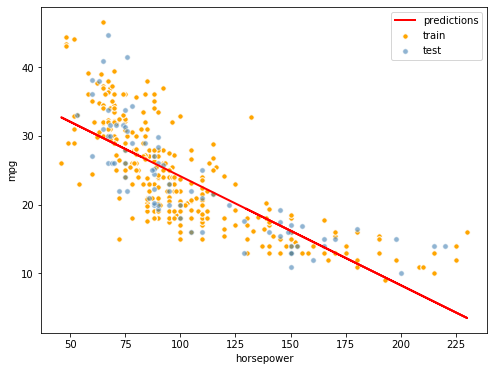

In [10]:
# Instantiate a Simple Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train,y_train)

# Look at how well the model is fitting the data by plotting the predictions for all points
all_preds = model.predict(X)
plt.figure(figsize=(8,6))
plt.scatter(X_train,y_train,color='orange',edgecolor='white',s=30,label='train') # Plot training data
plt.scatter(X_test,y_test,color='steelblue',edgecolor='white',s=30,alpha=0.6,label='test') # Plot test data
plt.plot(X,all_preds,color='red',lw=2,label='predictions') # Plot predictions
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.legend()
plt.show()

As we can see above, there appears to be a non-linear relationship between *horsepower* and *mpg* and our linear model is not able to fully capture the relationship.  Let's generate the predictions on the test set and calculate the mean squared error for both the training set and the test set predictions.

In [21]:
# Get the predictions on the training set and test set
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Calculate MSE
train_mse = 1/len(y_train)*np.sum((train_preds-y_train)**2)
test_mse = 1/len(y_test)*np.sum((test_preds-y_test)**2)
print('MSE train: {:.3f}, test: {:.3f}'.format(train_mse,test_mse))

MSE train: 24.430, test: 22.026


## Multiple Linear Regression
Now let's create a new Multiple Linear Regression model adding in some additional numerical features: *cylinders*, *displacement*, *weight*, *year*.

In [11]:
# Define the features and target (X and y)
X = data[['cylinders','displacement','horsepower','weight','acceleration','year']].astype(int)
y = data['mpg']

# Split into training and test sets using 20% of data for the test set
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.2)

# Instantiate the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train,y_train)

# Get the predictions on the training and test sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Calculate the mean squared error (MSE) for the training set and test set predictions
train_mse = 1/len(y_train)*np.sum((train_preds-y_train)**2)
test_mse = 1/len(y_test)*np.sum((test_preds-y_test)**2)
print('MSE train: {:.3f}, test: {:.3f}'.format(train_mse,test_mse))

MSE train: 11.539, test: 11.953


Great! If we compare the MSE on the test set for our new multiple linear regression model, we can see that it is a significant improvement over our original simple linear regression with just *horsepower*.  Let's now take a look at the equation which our model has generated

In [44]:
# Look at the coefficients of our model
coef = model.coef_
intercept = model.intercept_

# Print out the equation
equation = 'y = {:.3f} + '.format(intercept) + ' + '.join(['{:.3f}*{}'.format(coef,var) for coef,var in zip(coef,X.columns)])
print(equation)

y = -14.813 + -0.243*cylinders + 0.007*displacement + 0.005*horsepower + -0.007*weight + 0.154*acceleration + 0.742*year


Above we can see the equation produced by our model to relate the input features to the output y (*mpg*).

## LASSO Regression

Now let's apply a LASSO regression model to our data. When we use LASSO or Ridge, it is important to first put our features on the same scale before we build our model.  If we did not do this, we might have some features which take very large numbers (e.g. year) and other features with much smaller values (e.g. # cylinders). LASSO and Ridge use the magnitude of the coefficients of each feature in calculating the penaly.  The coefficient magnitudes are influences by the magnitude of the feature values themselves.  Therefore if we have features of very different magnitudes, it influences the calculation of our regularization penalty.

Scikit-Learn includes helpful functions to scale our data - in this case we will use one called `StandardScaler` below to standardize our data (so each feature has mean of 0 and standard deviation of 1 unit).

When we create a LASSO model using Scikit-Learn we can choose the value of the lambda penalty factor (which the Scikit-Learn API calls "alpha").  In this example we will leave it set to the default value, but in a real project we would use cross-validation to find the optimal lambda value that minimizes the LASSO cost function.

In [12]:
# Define the features and target (X and y)
X = data[['cylinders','displacement','weight','horsepower','acceleration','year']].astype(int)
y = data['mpg'].astype(float)

# Split into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [13]:
# First we scale our data - remember, only use the training data to fit the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run a LASSO model using the default lambda (which is called alpha in SKLearn) of 1.0
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train_scaled,y_train)
test_preds = lasso_model.predict(X_test_scaled)
mse_test = 1/y_test.shape[0]*np.sum((test_preds-y_test)**2)
print('MSE on the test set is {:.3f}'.format(mse_test))

MSE on the test set is 13.124


y = 23.482 + -0.000*cylinders + -0.000*displacement + -4.793*weight + -0.092*horsepower + 0.000*acceleration + 1.951*year


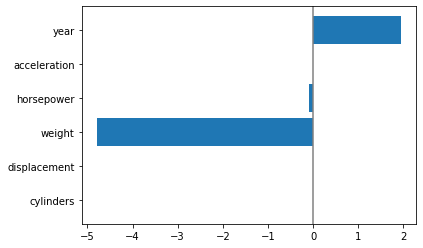

In [14]:
# Get the equation for the LASSO model
coef = lasso_model.coef_
intercept = lasso_model.intercept_

# Print out the equation
equation = 'y = {:.3f} + '.format(intercept) + ' + '.join(['{:.3f}*{}'.format(coef,var) for coef,var in zip(coef,X.columns)])
print(equation)

# Plot the coefficients
plt.barh(X.columns,coef)
plt.axvline(x=0, color='.5')
plt.show()

As we can see above, our LASSO model zeroed out several of our model coefficients, leaving only weight, horsepower, and year in our final model.

## Ridge Regression
Let's now run a Ridge regression model on our data.  Again, as with LASSO we first need to scale our data before we can run Ridge regression.

In [18]:
# First we scale our data - remember, only use the training data to fit the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run a Ridge model using the default lambda value in sklearn (called alpha in sklearn)
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train_scaled,y_train)
test_preds = ridge_model.predict(X_test_scaled)
mse_test = 1/y_test.shape[0]*np.sum((test_preds-y_test)**2)
print('MSE on the test set is {:.3f}'.format(mse_test))

MSE on the test set is 11.917


Equation of Ridge model:
y = 23.482 + -0.403*cylinders + 0.567*displacement + -5.728*weight + 0.095*horsepower + 0.380*acceleration + 2.692*year


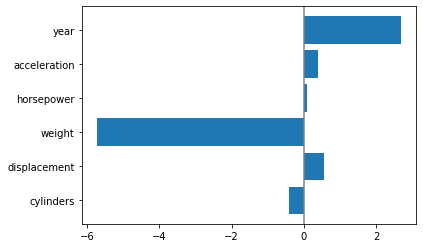

In [20]:
# Display final model and plot the coefficients
coef = ridge_model.coef_
intercept = ridge_model.intercept_
equation = 'y = {:.3f} + '.format(intercept) + ' + '.join(['{:.3f}*{}'.format(coef,var) for coef,var in zip(coef,X.columns)])
print('Equation of Ridge model:')
print(equation)
plt.barh(X.columns,coef)
plt.axvline(x=0, color='.5')
plt.show()

As we can see in the equation above, unlike LASSO our Ridge model did not zero out any of the coefficients.  It simply found the optimal value of the coefficents that resulted in the minimum of its cost function, which includes both the model performance (SSE) and the penalty factor.